1. Load the tips dataset from either pydataset or seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline


from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.formula.api import ols

import split_scale

In [2]:
df = pydataset.data("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [4]:
#split the data so we don't overfit the model
train, test = split_scale.split_my_data(df)

In [5]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
149,9.78,1.73,Male,No,Thur,Lunch,2
214,13.27,2.50,Female,Yes,Sat,Dinner,2
179,9.60,4.00,Female,Yes,Sun,Dinner,2
42,17.46,2.54,Male,No,Sun,Dinner,2
120,24.08,2.92,Female,No,Thur,Lunch,4


In [6]:
train = train[["total_bill","tip"]]

In [7]:
train.head()

,total_bill,tip
149,9.78,1.73
214,13.27,2.50
179,9.60,4.00
42,17.46,2.54
120,24.08,2.92


In [8]:
train.columns = ['x', 'y']

In [9]:
train.head()

,x,y
149,9.78,1.73
214,13.27,2.50
179,9.60,4.00
42,17.46,2.54
120,24.08,2.92


Evaluate baseline "performance" our model must "beat"

In [10]:
train['yhat_bl'] = train.y.median()

In [11]:
train['yhat_mean'] = train.y.mean()

In [12]:
train.head()

,x,y,yhat_bl,yhat_mean
149,9.78,1.73,2.745,2.896882
214,13.27,2.50,2.745,2.896882
179,9.60,4.00,2.745,2.896882
42,17.46,2.54,2.745,2.896882
120,24.08,2.92,2.745,2.896882


In [13]:
rmse_bl = sqrt(mean_squared_error(train.y, train.yhat_bl))
rmse_mean = sqrt(mean_squared_error(train.y, train.yhat_mean))

In [14]:
print(rmse_bl, rmse_mean)

1.2477911071404635 1.2385129785044142


Now that I have my baseline (yhat_mean) I'll build my simple regression model

In [15]:
ols_model = ols('y ~ x', data = train).fit()

In [16]:
train['yhat'] = ols_model.predict(train.x)

In [17]:
train.head()

,x,y,yhat_bl,yhat_mean,yhat
149,9.78,1.73,2.745,2.896882,2.038397
214,13.27,2.50,2.745,2.896882,2.358964
179,9.60,4.00,2.745,2.896882,2.021863
42,17.46,2.54,2.745,2.896882,2.743828
120,24.08,2.92,2.745,2.896882,3.351895


3. Plot the residuals for the linear regression model that you made.

In [18]:
train['residual'] = train['yhat'] - train['y']
train['residual_baseline'] = train['yhat_bl'] - train['y']

In [19]:
train.head()

,x,y,yhat_bl,yhat_mean,yhat,residual,residual_baseline
149,9.78,1.73,2.745,2.896882,2.038397,0.308397,1.015
214,13.27,2.50,2.745,2.896882,2.358964,-0.141036,0.245
179,9.60,4.00,2.745,2.896882,2.021863,-1.978137,-1.255
42,17.46,2.54,2.745,2.896882,2.743828,0.203828,0.205
120,24.08,2.92,2.745,2.896882,3.351895,0.431895,-0.175


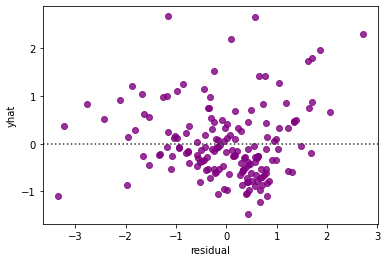

In [81]:
sns.residplot(data = train, x="residual", y="yhat", color="purple")

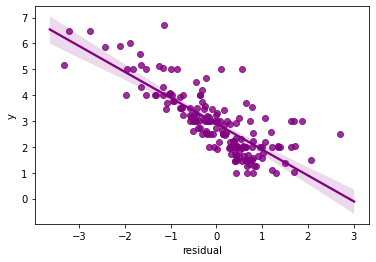

In [21]:
sns.regplot(data = train, x="residual", y="y", color="purple")

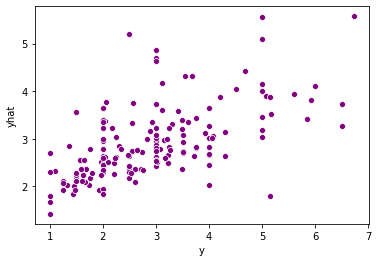

In [83]:
sns.scatterplot(data = train, x="y", y="yhat", color="purple")

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

- Sum of Squared Errors (SSE)

- Explained Sum of Squares (ESS)

- Total Sum of Squares (TSS)

- Mean squared error (MSE)

- Root Mean Squared Error (RMSE)

In [46]:
model_sse = sum(train['residual']**2)
model_sse

163.50474579834335

In [47]:
bl_sse = sum(train['residual_baseline']**2)
bl_sse

264.68704999999994

In [37]:
model_ess = sum((train.yhat - train.y.mean())**2)

In [38]:
bl_ess = sum((train.yhat_bl - train.y.mean())**2)

In [39]:
model_tss = train['model_sse'] + train['model_ess']

In [40]:
bl_tss = train['bl_sse'] + train['bl_ess']

In [41]:
model_mse = mean_squared_error(train.y, train.yhat)

In [42]:
bl_mse = mean_squared_error(train.y, train.yhat_bl)

In [43]:
model_rmse = sqrt(mean_squared_error(train.y, train.yhat))

In [44]:
bl_rmse = sqrt(mean_squared_error(train.y, train.yhat_bl))

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [70]:
bl_sse > model_sse

True

7. What is the amount of variance explained in your model?

In [59]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(train.y, train.yhat)

In [60]:
evs

0.3729815538305369

8. Is your model significantly better than the baseline model?

In [62]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     99.93
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           9.34e-19
Time:                        11:29:13   Log-Likelihood:                -237.91
No. Observations:                 170   AIC:                             479.8
Df Residuals:                     168   BIC:                             486.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1401      0.191      5.959      0.000       0.762       1.518
x              0.0919      0.009      9.997      0.000       0.074       0.110
==============================================================================
Omnibus:                       14.604   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.203
Skew:                           0.602   Prob(JB):                     0.000184
Kurtosis:                       3.990   Cond. No.                         52.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
ols_model.rsquared

0.37298155383053677

In [64]:
ols_model.f_pvalue

9.335713461459742e-19

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [85]:
def plot_residuals(y, yhat, color="purple"):
    sns.scatterplot(y, yhat, color=color)

In [67]:
def regression_errors(y, yhat):
    """
    Takes in two columns: y - actual values, and yhat - predictions
    returns 5 values in this order:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    """
    SSE = mean_squared_error(y, yhat)*len(y)
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE
    MSE = mean_squared_error(y, yhat)
    RMSE = sgrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE
    

In [68]:
def baseline_mean_errors(y):
    """
    Takes in one column: y - actual values
    Returns 3 baseline values in this oder:
    sum of squared errors (SSE)
    mean squared error (MSE)
    root mean squared error (RMSE)
    """
    SSE = mean_squared_error(y, y.mean())*len(y)
    MSE = mean_squared_error(y, y.mean())
    RMSE = sqrt(MSE)
    return SSE, MSE, RMSE

In [75]:
def better_than_baseline(y, yhat):
    """
    Takes in two columns: y - actual values, and yhat - predictions
    Returns True if model is performing better than the baseline.
    Our baseline in this function is the mean of y
    """
    SSE = mean_squared_error(y, yhat)*len(y)
    SSE_baseline = mean_squared_error(y, y.mean())*len(y)
    if SSE > SSE_baseline:
        return True
    else:
        return False

In [77]:
def model_significance(ols_model):
    r2 = ols_model.rsquared
    f_pvalue = ols_model.f_pvalue
    return "p-value = ", f_pvalue, "R-Squared = ", r2